# Ejemplo de implementación con MNIST

Ejercicio obtenido de Géron, A. (2019). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow: Concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.".

10. Utiliza t-SNE para reducir el conjunto de datos MNIST a dos dimensiones y traza el resultado utilizando Matplotlib. Puede utilizar un gráfico de dispersión utilizando 10 colores diferentes para representar la clase de destino de cada imagen. Alternativamente, puede reemplazar cada punto en el gráfico de dispersión con la clase de la instancia correspondiente (un dígito de 0 a 9), o incluso trazar versiones reducidas de las imágenes de los dígitos mismos (si traza todos los dígitos, la visualización será demasiado desordenada, por lo que debe dibujar una muestra aleatoria o trazar una instancia sólo si ninguna otra instancia ya ha sido trazada a una distancia cercana). Debería obtener una buena visualización con grupos de dígitos bien separados. Pruebe a utilizar otros algoritmos de reducción de la dimensionalidad, como PCA, LLE o MDS, y compare las visualizaciones resultantes.

In [ ]:
import sklearn
import numpy as np

np.random.seed(42)

# Configuración de las Graficas
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Importamos el dataset MNIST

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

Revisamos los datos

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Las columnas que nos interesan son "data" y "target"

La columna "data" consta de 70000 imagenes, cada imagen tiene 784 pixeles

In [ ]:
shape=mnist['data'].shape
print(shape)

(70000, 784)


La columna "target" consta de las etiquetas de las imagenes de "data"

In [ ]:
shape=mnist['target'].shape
print(shape)

(70000,)


Seleccionamos un subconjunto de 10000 imagenes aleatorias ya que trabajar con las 70000 es muy tardado 

In [ ]:
np.random.seed(42)

m = 10000
idx = np.random.permutation(70000)[:m]

X = mnist['data'][idx]
y = mnist['target'][idx]

Veamos un elemento de "data" y de "target"

Etiqueta 3


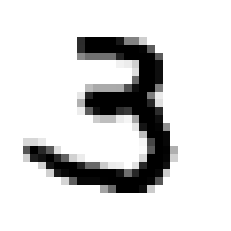

In [ ]:
nexample=55
some_digit = X[nexample]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

print( "Etiqueta " + str(y[nexample]))
plt.show()

Reducimos las dimensiones a 2D con t-SNE

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

#El valor por defecto de la perplejidad es 30
#La metrica por defecto es euclidiana
#El numero maximo de iteraciones por defecto es 1000
#La inicialización de la incrustación por defecto es aleatoria

#Tambien se puede modificar la forma en que se generan los números aleatorios
#Y establecer condiciones para detener las iteraciones 

c:\Users\saezl\Documents\InteligenciaArtificialAutodidacta\HandsOnMachineLearning\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\saezl\Documents\InteligenciaArtificialAutodidacta\HandsOnMachineLearning\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Para visualizar el resultado un diagrama de disperción utilizando un color distinto para cada dígito

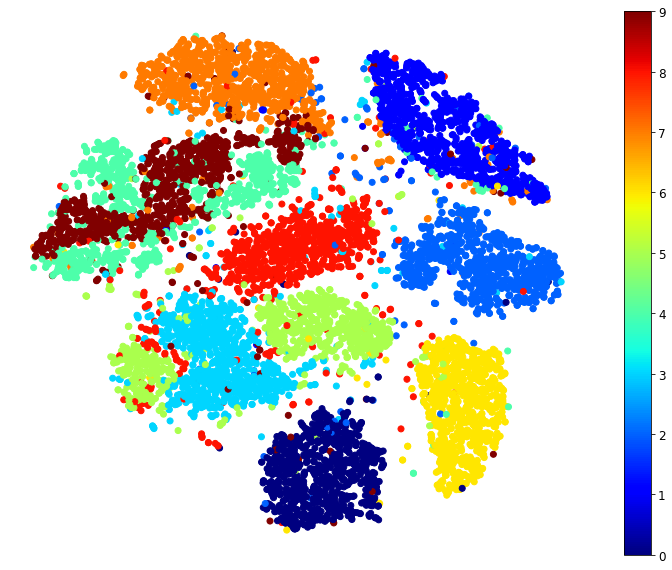

In [ ]:
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

De esta grafica podemos extraer información valiosa por ejemplo:

* Podemos notar que la máyoria de los dígitos estan agupados y estos grupos estan separados unos de otros.

* A su vez, los grupos de digitos que estan mezclados indican que es dificil distinguirlos unos de otros, por ejemplo el 9 y el 4.

* Y por el contrario, los grupos alejados indican que claramente son distinguibles, por ejemplo el 0 y el 6.

Prestemos atención a los digitos 2, 3 y 5

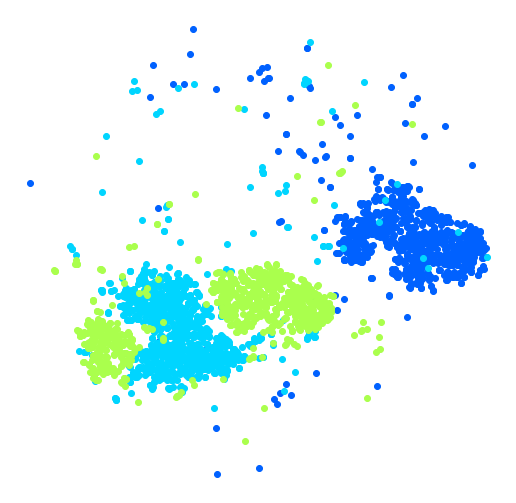

In [ ]:
plt.figure(figsize=(9,9))
cmap = mpl.cm.get_cmap("jet")
for digit in (2, 3, 5):
    plt.scatter(X_reduced[y == digit, 0], X_reduced[y == digit, 1], c=[cmap(digit / 9)])
plt.axis('off')
plt.show()

Implementemos t-SNE a esos dígitos para tener un mejor resultado

In [ ]:
idx = (y == 2) | (y == 3) | (y == 5) 
X_subset = X[idx]
y_subset = y[idx]

tsne_subset = TSNE(n_components=2, random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

c:\Users\saezl\Documents\InteligenciaArtificialAutodidacta\HandsOnMachineLearning\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\saezl\Documents\InteligenciaArtificialAutodidacta\HandsOnMachineLearning\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


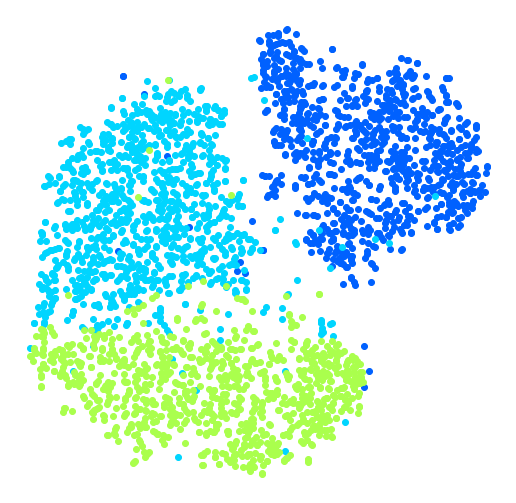

In [ ]:
plt.figure(figsize=(9,9))
for digit in (2, 3, 5):
    plt.scatter(X_subset_reduced[y_subset == digit, 0], X_subset_reduced[y_subset == digit, 1], c=[cmap(digit / 9)])
plt.axis('off')
plt.show()

El resultado es visiblemente superior al obtenido al principio

Graficando los puntos con su digito correspondiente (Código Obtenido del Libro)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

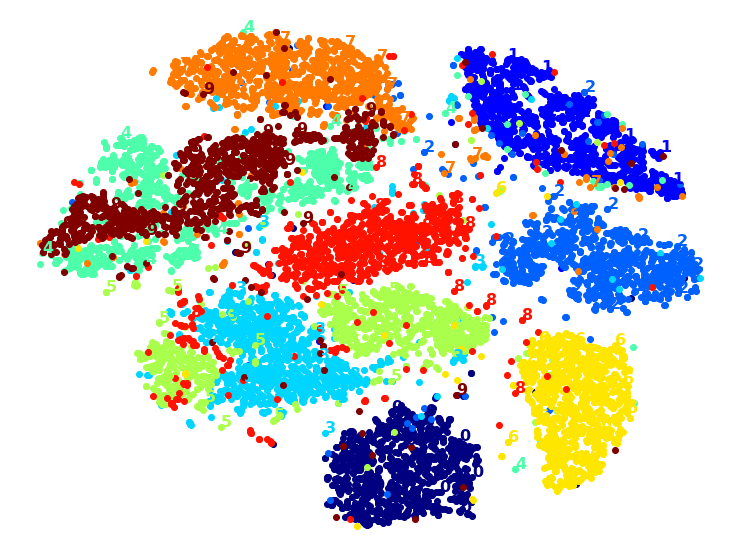

In [ ]:
plot_digits(X_reduced, y)

Graficando los puntos con sus imagenes

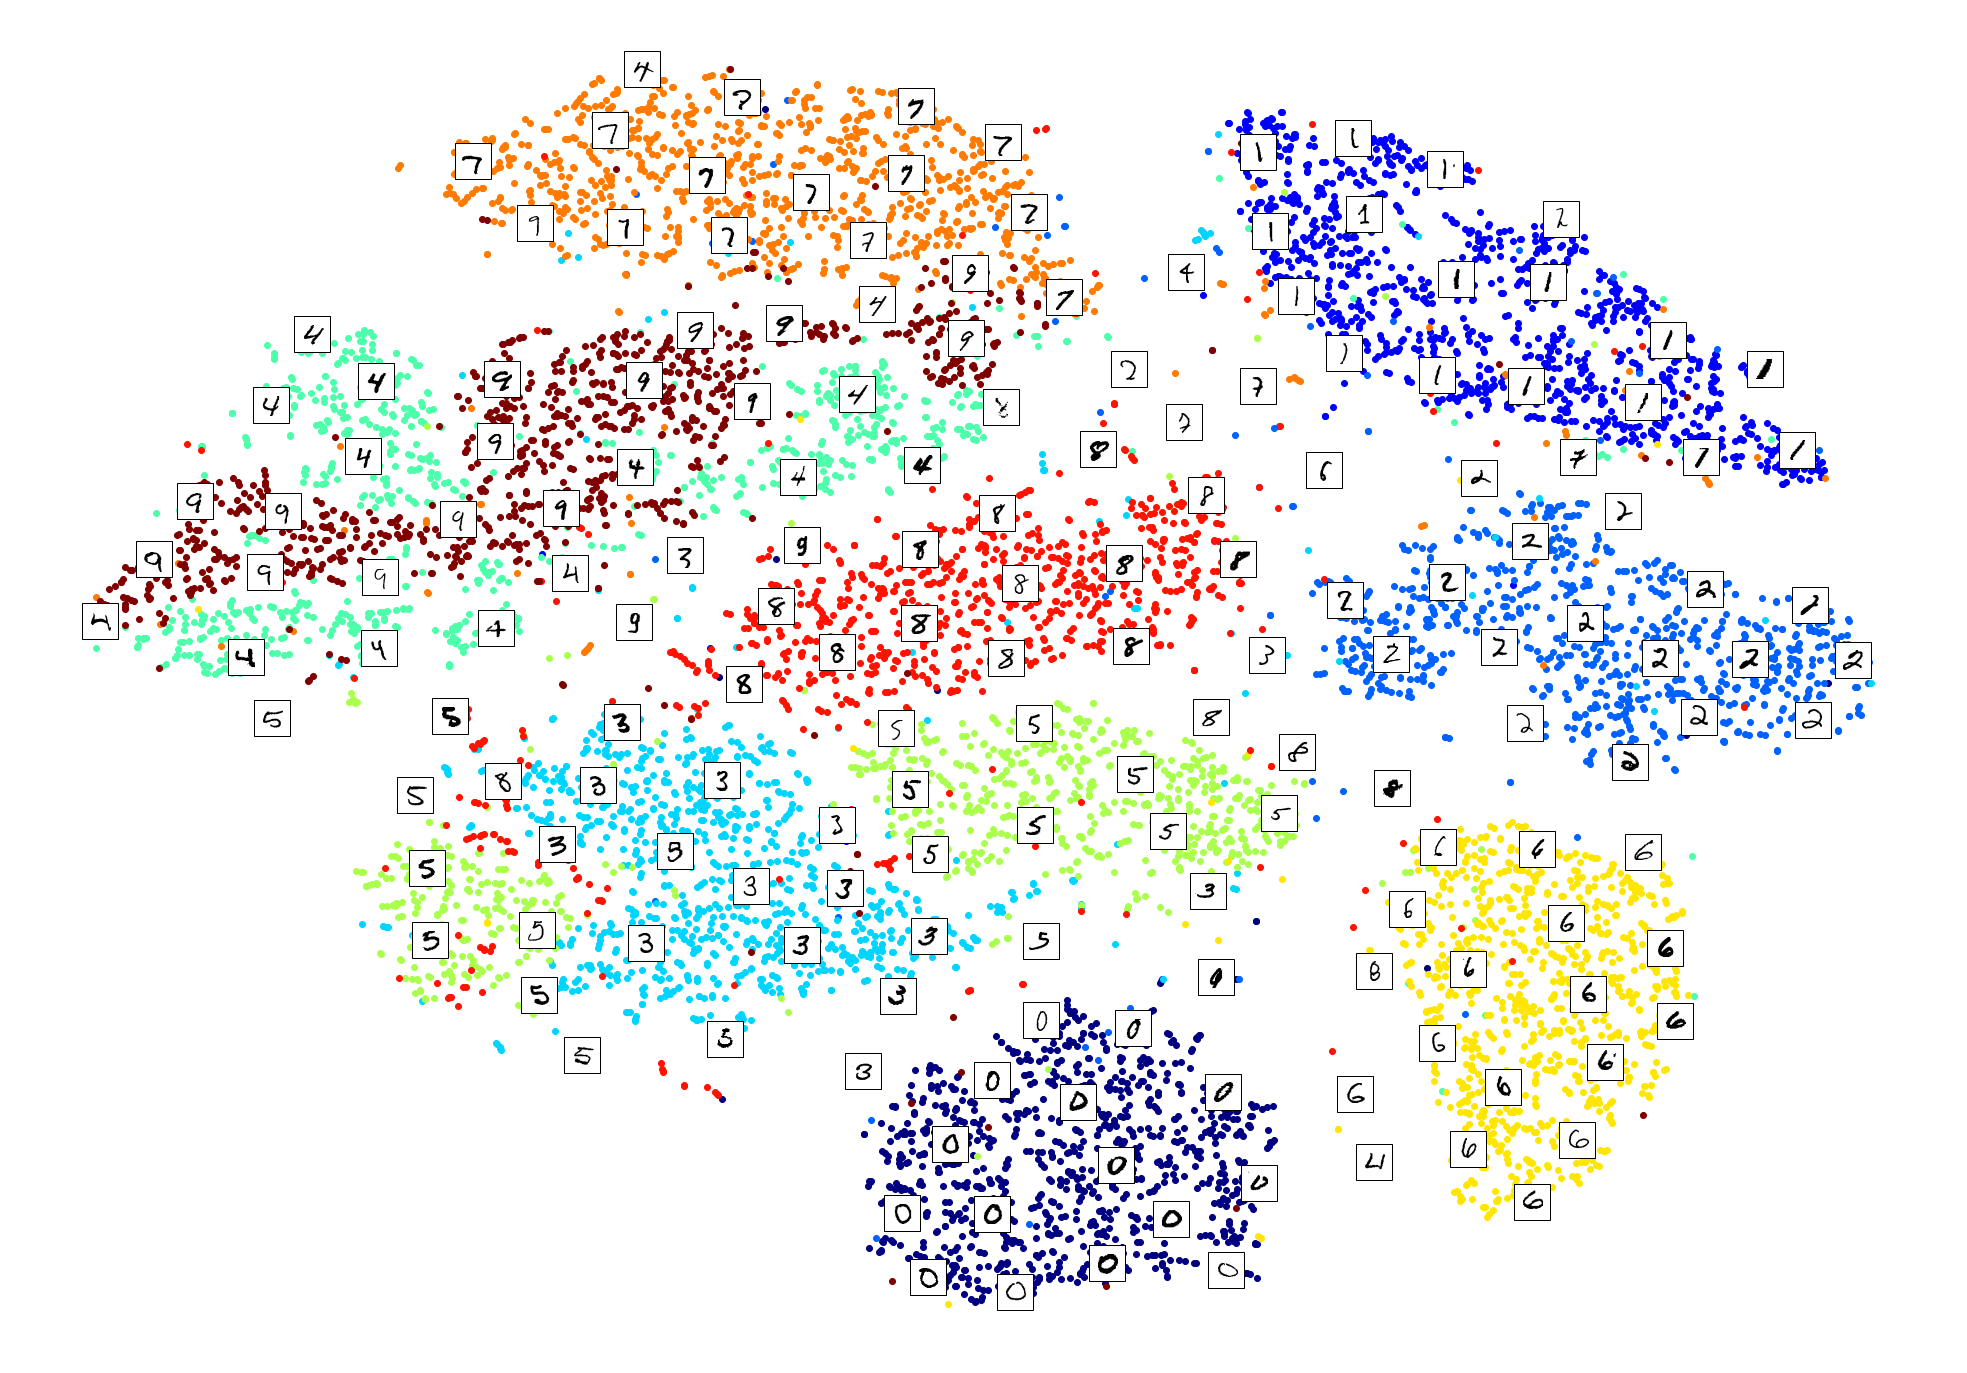

In [ ]:
plot_digits(X_reduced, y, images=X, figsize=(35, 25))